In [11]:
## New Plant Diseases Dataset
# Librays Used

import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

Menyiapkan Dataset

In [12]:
data_dir = "../dataset/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [14]:
# printing the disease names
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite',

In [15]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [16]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [17]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry_(including_sour)', 'Corn_(maize)', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [18]:
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [19]:
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [20]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                           4032
Apple___Black_rot                                            3974
Apple___Cedar_apple_rust                                     3520
Apple___healthy                                              4016
Blueberry___healthy                                          3632
Cherry_(including_sour)___healthy                            3652
Cherry_(including_sour)___Powdery_mildew                     3366
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           3284
Corn_(maize)___Common_rust_                                  3814
Corn_(maize)___healthy                                       3718
Corn_(maize)___Northern_Leaf_Blight                          3816
Grape___Black_rot                                            3776
Grape___Esca_(Black_Measles)                                 3840
Grape___healthy                                              3384
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   3444
Orange___Haunglongbing_(Citrus_greening)                     4020
Peach___Bacterial_spot                                       3676
Peach___healthy                                              3456
Pepper,_bell___Bacterial_spot                                3826
Pepper,_bell___healthy                                       3976
Potato___Early_blight                                        3878
Potato___healthy                                             3648
Potato___Late_blight                                         3878
Raspberry___healthy                                          3562
Soybean___healthy                                            4044
Squash___Powdery_mildew                                      3472
Strawberry___healthy                                         3648
Strawberry___Leaf_scorch                                     3548
Tomato___Bacterial_spot                                      3404
Tomato___Early_blight                                        3840
Tomato___healthy                                             3852
Tomato___Late_blight                                         3702
Tomato___Leaf_Mold                                           3764
Tomato___Septoria_leaf_spot                                  3490
Tomato___Spider_mites Two-spotted_spider_mite                3482
Tomato___Target_Spot                                         3654
Tomato___Tomato_mosaic_virus                                 3580
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       3922

Text(0.5, 1.0, 'Images per each class of plant disease')

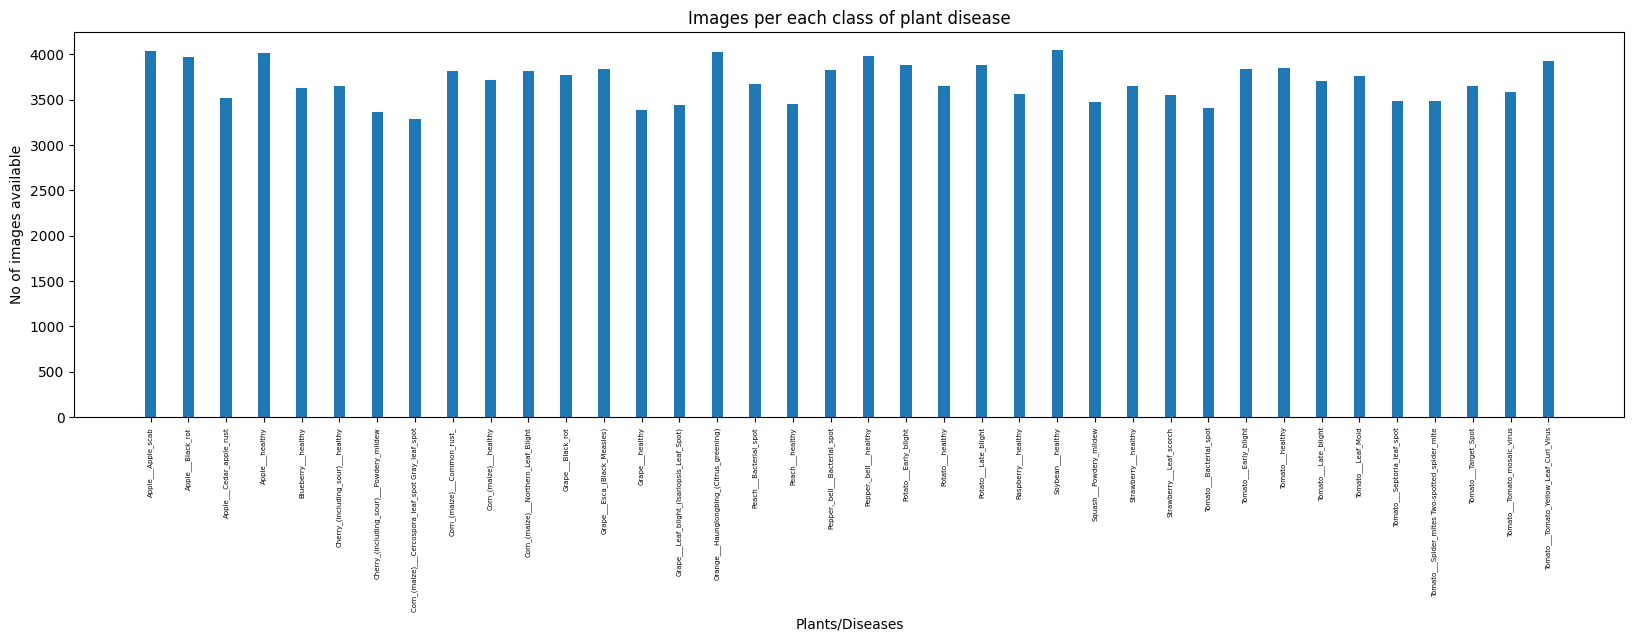

In [21]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [22]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 140590 images for training


🍳 Data Preparation for training 🍳

In [23]:
# datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor()) 

Selanjutnya, setelah memuat data, kita perlu mentransformasi nilai piksel dari setiap gambar (0-255) menjadi 0-1 karena jaringan saraf bekerja dengan baik pada data yang dinormalisasi. Seluruh array nilai piksel diubah menjadi tensor torch dan kemudian dibagi dengan 255. Jika Anda tidak familiar mengapa normalisasi input membantu jaringan saraf, bacalah postingan ini.

In [24]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


Kita dapat melihat bentuk gambar (3, 256, 256). Angka 3 adalah jumlah saluran (RGB) dan 256 x 256 adalah lebar dan tinggi gambar.

In [25]:
# total number of classes in train set
len(train.classes)

38

Jumlah kelas untuk data training adalah 38 kelas

🖼️ Some Images from training dataset 🖼️

In [27]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label :Apple___Apple_scab(0)


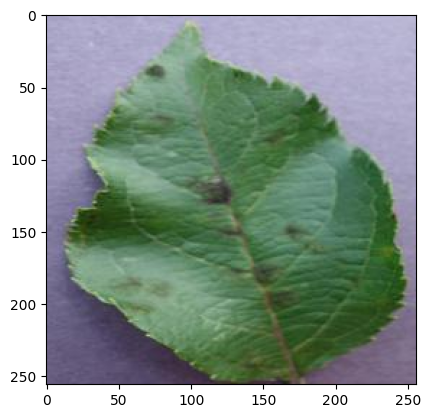

In [31]:
show_image(*train[0])

In [34]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

# setting the batch size
batch_size = 32

random_seed = 7:

Menetapkan nilai seed menjadi 7. Nilai ini bisa berupa angka apapun. Angka 7 hanya dipilih sebagai contoh; Anda dapat memilih angka lain sesuai keinginan.
torch.manual_seed(random_seed):

Fungsi torch.manual_seed menetapkan seed untuk generator angka acak di PyTorch. Dengan melakukan ini, semua operasi acak yang dilakukan oleh PyTorch akan menghasilkan hasil yang sama setiap kali kode dijalankan, selama nilai seed tidak diubah.

batch_size adalah jumlah total gambar yang diberikan sebagai input sekaligus dalam propagasi maju dari CNN. Secara sederhana, batch size mendefinisikan jumlah sampel yang akan dipropagasi melalui jaringan.

Misalnya, katakanlah Anda memiliki 1050 sampel pelatihan dan Anda ingin menetapkan batch_size sama dengan 100. Algoritma akan mengambil 100 sampel pertama (dari sampel ke-1 hingga ke-100) dari dataset pelatihan dan melatih jaringan. Selanjutnya, algoritma mengambil 100 sampel kedua (dari sampel ke-101 hingga ke-200) dan melatih jaringan lagi. Kita dapat terus melakukan prosedur ini sampai semua sampel telah dipropagasi melalui jaringan.

"dipropagasi" dalam konteks pelatihan jaringan saraf mengacu pada proses perpindahan informasi dari input melalui jaringan (propagasi maju) dan kemudian kembali ke jaringan untuk melakukan penyesuaian bobot dan bias berdasarkan kesalahan (propagasi mundur). Ini adalah proses inti dalam pelatihan jaringan saraf untuk mempelajari pola dan memperbaiki kinerja model.

In [35]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

DataLoader adalah sebuah subclass yang berasal dari torch.utils.data. Ini membantu dalam memuat dataset yang besar dan memakan memori. DataLoader menerima batch_size yang menunjukkan jumlah sampel yang terdapat dalam setiap batch yang dihasilkan.

Mengatur shuffle=True mengacak dataset. Ini berguna agar batch antara epoch tidak terlihat sama. Melakukan hal ini pada akhirnya akan membuat model kita lebih tangguh.

num_workers menunjukkan jumlah proses yang menghasilkan batch secara paralel. Jika Anda memiliki lebih banyak inti pada CPU Anda, Anda dapat mengaturnya menjadi jumlah inti pada CPU Anda. Karena Kaggle menyediakan CPU 2 inti, saya telah mengaturnya menjadi 2.

In [36]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

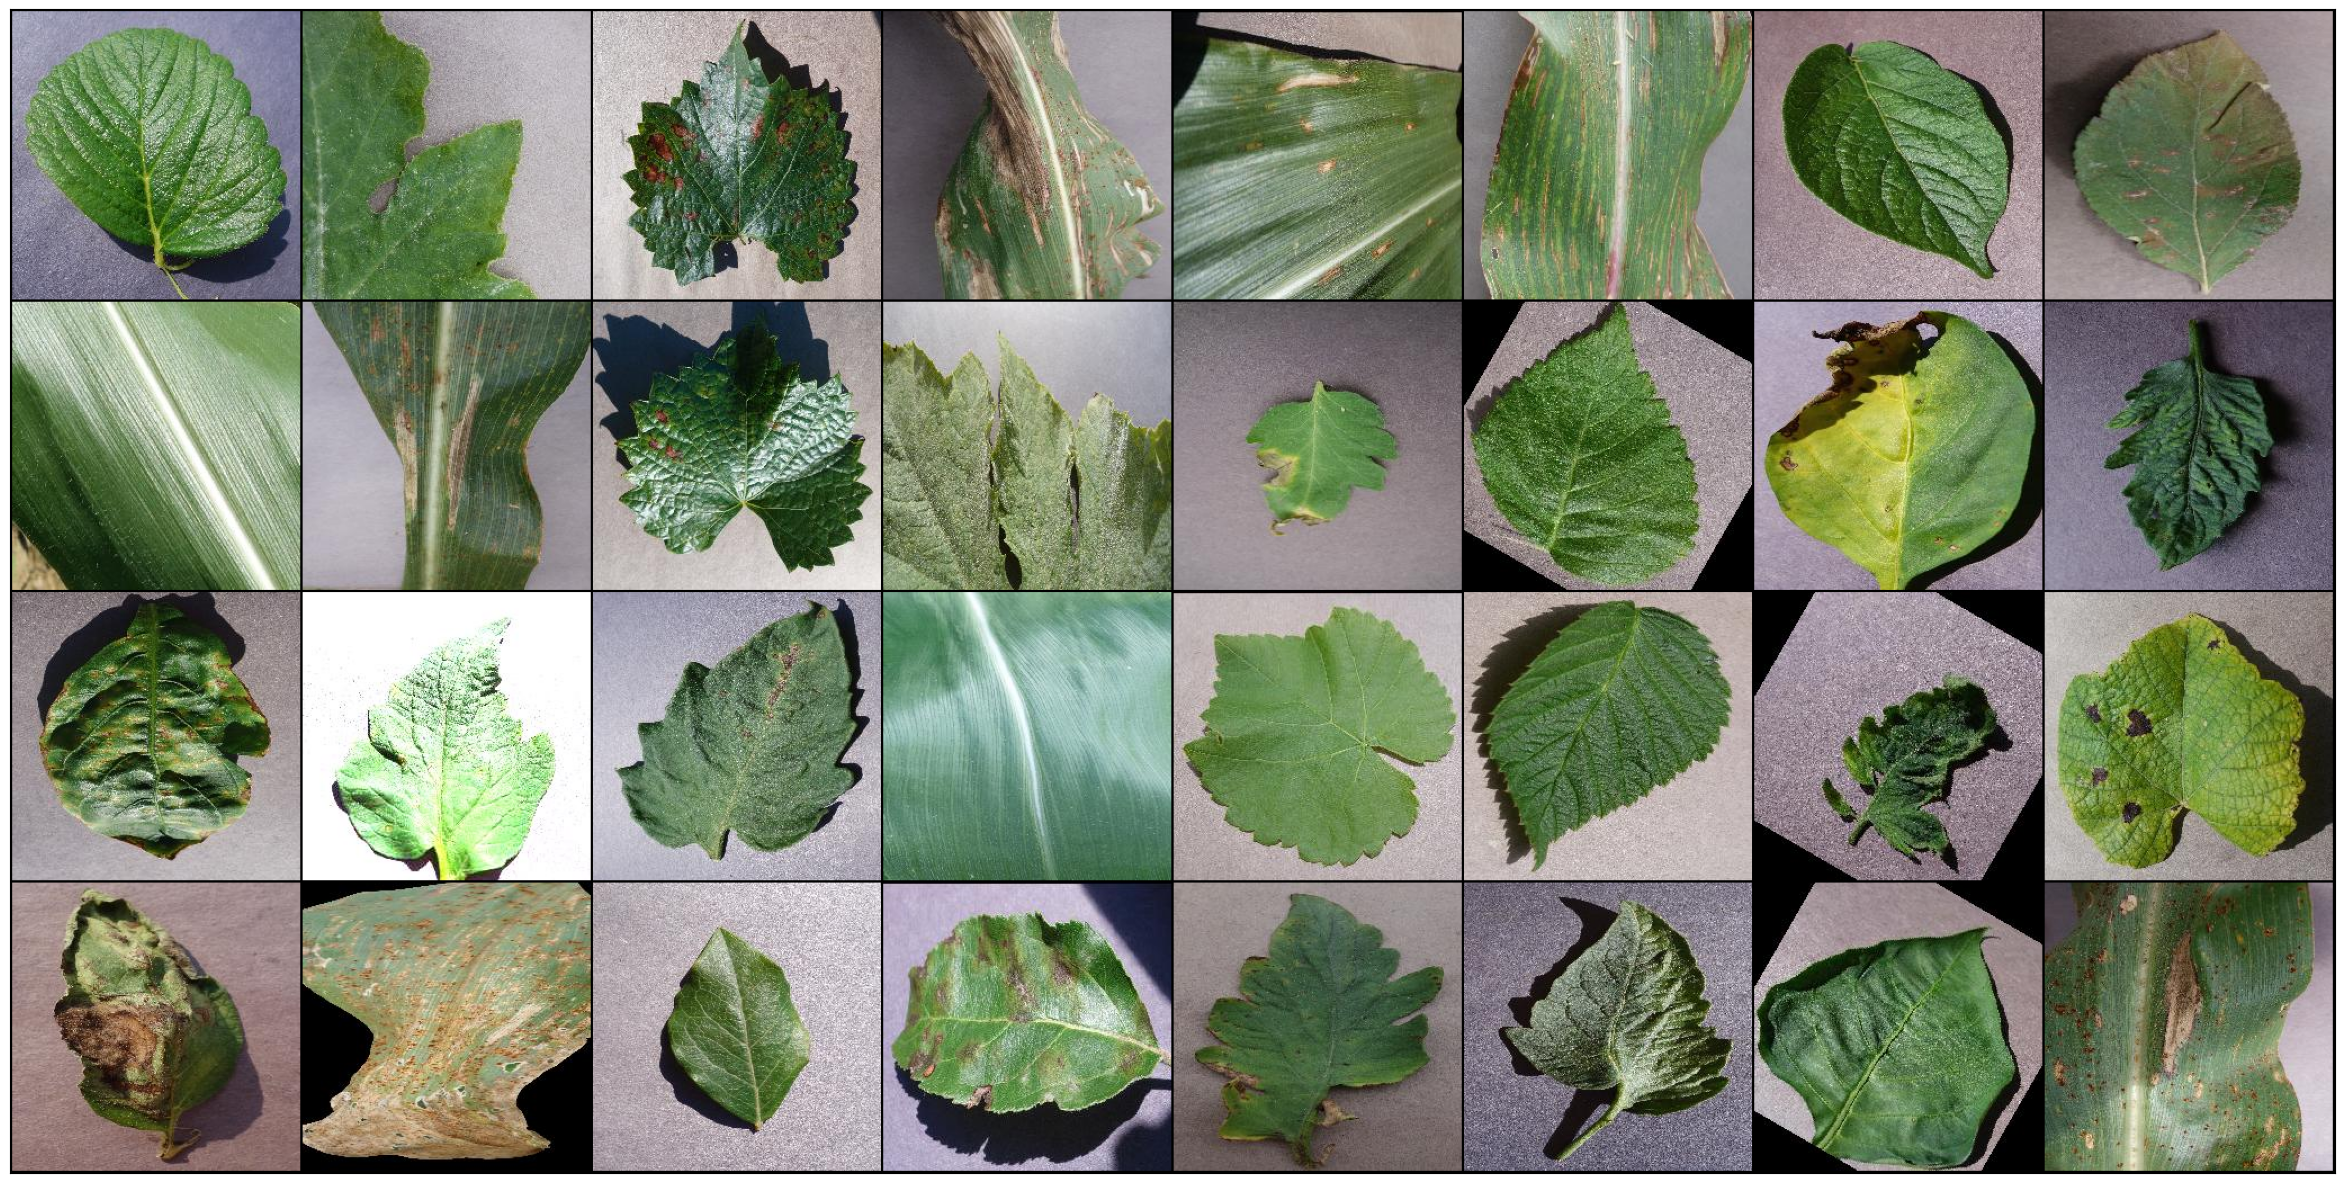

In [37]:
# Images for first batch of training
show_batch(train_dl)

🏗️ Modelling 🏗️¶

Disarankan untuk menggunakan GPU daripada CPU ketika menangani dataset gambar karena CPU umumnya digunakan untuk tujuan umum, sedangkan GPU dioptimalkan untuk pelatihan model deep learning karena dapat memproses banyak komputasi secara simultan. GPU memiliki sejumlah besar inti, yang memungkinkan untuk komputasi yang lebih baik dari beberapa proses paralel. Selain itu, komputasi dalam deep learning perlu menangani jumlah data yang besar — ini membuat lebar pita memori GPU paling cocok. Untuk menggunakan GPU dengan lancar, jika tersedia, kita mendefinisikan beberapa fungsi bantu (get_default_device & to_device) dan sebuah kelas bantu DeviceDataLoader untuk memindahkan model dan data kita ke GPU sesuai kebutuhan.

In [39]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Checking the device we are working with

In [40]:
device = get_default_device()
device

device(type='cuda')

In [41]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

Dengan melakukan ini, Anda akan memiliki data loaders yang siap digunakan untuk pelatihan dan validasi, dan batch data akan secara otomatis dipindahkan ke GPU jika tersedia, sehingga mempercepat proses pelatihan pada model Anda.

👷 Building the model architecture 👷¶

Dalam ResNets, berbeda dengan jaringan saraf tradisional, setiap lapisan mengalir ke lapisan berikutnya, kita menggunakan jaringan dengan blok residual, setiap lapisan mengalir ke lapisan berikutnya dan langsung ke lapisan sekitar 2-3 langkah, untuk menghindari overfitting (situasi ketika kerugian validasi berhenti menurun pada suatu titik dan kemudian terus meningkat sementara kerugian pelatihan masih menurun). Ini juga membantu mencegah masalah gradien yang hilang dan memungkinkan kita untuk melatih jaringan saraf yang dalam. Berikut adalah blok residual sederhana:

In [42]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [44]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

Kemudian kami mendefinisikan kelas ImageClassificationBase kami yang fungsi-fungsinya adalah:

training_step: Untuk mengetahui seberapa "salah" model berjalan setelah langkah pelatihan atau validasi. Kami menggunakan fungsi ini selain hanya metrik akurasi yang kemungkinan besar tidak akan dapat dibedakan (ini akan berarti bahwa gradien tidak dapat ditentukan, yang diperlukan agar model dapat meningkat selama pelatihan). Pada dasarnya, kami menggunakan fungsi ini untuk menghitung loss yang dihasilkan oleh model menggunakan cross_entropy function.

validation_step: Karena metrik akurasi tidak dapat digunakan saat melatih model, bukan berarti itu tidak harus diimplementasikan! Akurasi dalam hal ini akan diukur oleh ambang batas (threshold), dan dihitung jika perbedaan antara prediksi model dan label aktual lebih rendah dari ambang batas tersebut.

validation_epoch_end: Kami ingin melacak kerugian/akurasi validasi dan kerugian pelatihan setelah setiap epoch, dan setiap kali kami melakukannya kami harus memastikan bahwa gradien tidak dilacak.

epoch_end: Kami juga ingin mencetak kerugian/akurasi validasi, kerugian pelatihan, dan tingkat pembelajaran juga karena kami menggunakan penjadwal pembelajaran (yang akan mengubah tingkat pembelajaran setelah setiap batch pelatihan) setelah setiap epoch.

Kami juga mendefinisikan fungsi akurasi yang menghitung akurasi keseluruhan model pada satu batch output, sehingga kami dapat menggunakannya sebagai metrik dalam fit_one_cycle.

========================================

👷 Defining the final architecture of our model 👷

In [45]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

Sekarang, kita mendefinisikan objek model dan mentransfernya ke perangkat yang kita gunakan...

In [55]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

Let's check our validation loss and accuracy

In [59]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

NameError: name 'history' is not defined